In [1]:
import schemdraw
from schemdraw import elements as elm
from schemdraw import logic
from schemdraw import dsp
from schemdraw import flow
from schemdraw.util import Point
schemdraw.use('svg')
#schemdraw.svgconfig.text = 'text'

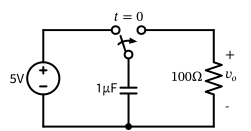

In [2]:
d = schemdraw.Drawing()
V1 = d.add(elm.SourceV(label='5V'))
d.add(elm.Line(d='right', l=d.unit*.75))
S1 = d.add(elm.SwitchSpdt2(d='up', action='close', anchor='b', rgtlabel='$t=0$'))
d.add(elm.Line(d='right', xy=S1.c,  l=d.unit*.75))
d.add(elm.Resistor(d='down', label='$100\Omega$', botlabel=['+','$v_o$','-']))
d.add(elm.Line(to=V1.start))
d.add(elm.Capacitor(xy=S1.a, d='down', toy=V1.start, label='1$\mu$F'))
d.add(elm.Dot())
d.draw()


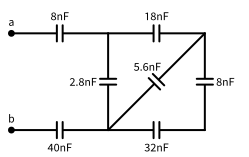

In [3]:
d = schemdraw.Drawing(fontsize=12)
A  = d.add(elm.Dot(label='a'))
C1 = d.add(elm.Capacitor(label='8nF'))
C2 = d.add(elm.Capacitor(label='18nF'))
C3 = d.add(elm.Capacitor(botlabel='8nF', d='down'))
C4 = d.add(elm.Capacitor(botlabel='32nF', d='left'))
C5 = d.add(elm.Capacitor(botlabel='40nF'))
B  = d.add(elm.Dot(label='b'))
C6 = d.add(elm.Capacitor(label='2.8nF', endpts=[C1.end,C5.start]))
C7 = d.add(elm.Capacitor(endpts=[C2.end,C5.start]))
C7.add_label('5.6nF', loc='center', ofst=[-.3,-.1], align=('right','bottom'))
d.draw()

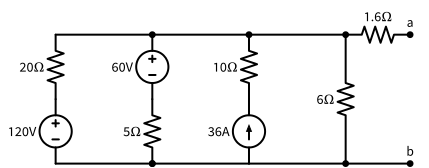

In [4]:
d = schemdraw.Drawing(unit=2)  # unit=2 makes elements have shorter than normal leads
d.push()
R1 = d.add(elm.Resistor(d='down', label='20$\Omega$'))
V1 = d.add(elm.SourceV(d='down', reverse=True, label='120V'))
d.add(elm.Line(d='right', l=3))
d.add(elm.Dot())
d.pop()
d.add(elm.Line(d='right', l=3))
d.add(elm.Dot())
d.add(elm.SourceV(d='down', label='60V', reverse=True))
d.add(elm.Resistor(label='5$\Omega$'))
d.add(elm.DOT())
d.add(elm.Line(d='right', l=3))
d.add(elm.SourceI(d='up', label='36A'))
d.add(elm.Resistor(label='10$\Omega$'))
d.add(elm.DOT())
d.add(elm.Line(d='left', l=3, move_cur=False))
d.add(elm.Line(d='right', l=3))
d.add(elm.DOT())
R6 = d.add(elm.Resistor(d='down', toy=V1.end, label='6$\Omega$'))
d.add(elm.DOT())
d.add(elm.Line(d='left', l=3, move_cur=False))
d.add(elm.Resistor(d='right', xy=R6.start, label='1.6$\Omega$'))
d.add(elm.Dot(label='a'))
d.add(elm.Line(d='right', xy=R6.end))
d.add(elm.Dot(label='b'))
d.draw()


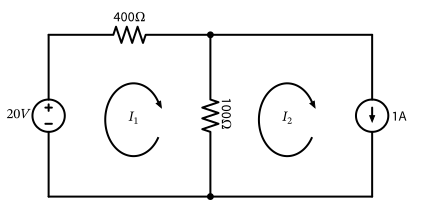

In [5]:
d = schemdraw.Drawing(unit=5)
V1 = d.add(elm.SourceV(label='$20V$'))
R1 = d.add(elm.Resistor(d='right', label='400$\Omega$'))
d.add(elm.Dot())
d.push()
R2 = d.add(elm.Resistor(d='down', botlabel='100$\Omega$', lblrotate=True))
d.add(elm.Dot())
d.pop()
L1 = d.add(elm.Line())
I1 = d.add(elm.SourceI(d='down', botlabel='1A'))
L2 = d.add(elm.Line(d='left', tox=V1.start))
d += elm.LoopCurrent([R1,R2,L2,V1], pad=1.25).label('$I_1$')
d += elm.LoopCurrent([R1,I1,L2,R2], pad=1.25).label('$I_2$')    # Use R1 as top element for both so they get the same heightd.draw()
d.draw()

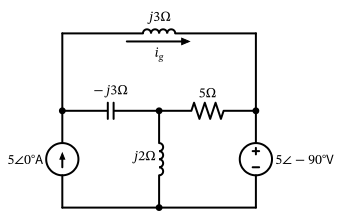

In [6]:
d = schemdraw.Drawing()
I1 = d.add(elm.SourceI(label=r'$5\angle 0^{\circ}$A'))
d.add(elm.Dot())
d.push()
d.add(elm.Capacitor(d='right', label=r'$-j3\Omega$'))
d.add(elm.Dot())
d.push()
d.add(elm.Inductor(d='down', label=r'$j2\Omega$'))
d.add(elm.Dot())
d.pop()
d.add(elm.Resistor(d='right', label=r'$5\Omega$'))
d.add(elm.Dot())
V1 = d.add(elm.SourceV(d='down', reverse=True, botlabel=r'$5\angle -90^{\circ}$V'))
d.add(elm.Line(d='left', tox=I1.start))
d.pop()
d.add(elm.Line(d='up', l=d.unit*.8))
L1 = d.add(elm.Inductor(d='right', label=r'$j3\Omega$', tox=V1.start))
d.add(elm.Line(d='down', l=d.unit*.8))
l = d.add(elm.CurrentLabel(ofst=.25, top=False).at(L1).label('$i_g$', ofst=.05))
d.draw()

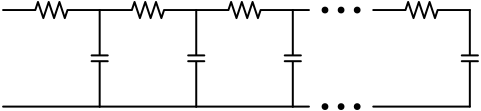

In [7]:
d1 = schemdraw.Drawing()
d1.add(elm.Resistor())
d1.push()
d1.add(elm.Capacitor(d='down'))
d1.add(elm.Line(d='left'))
d1.pop()

d2 = schemdraw.Drawing()
for i in range(3):
    d2.add(elm.ElementDrawing(d1))

d2.push()
d2.add(elm.Line(l=d2.unit/6))
d2.add(elm.DotDotDot)
d2.add(elm.ElementDrawing(d1))
d2.pop()
d2.here = [d2.here[0], d2.here[1]-d2.unit]
d2.add(elm.Line(d='right', l=d2.unit/6))
d2.add(elm.DotDotDot)
d2.draw()


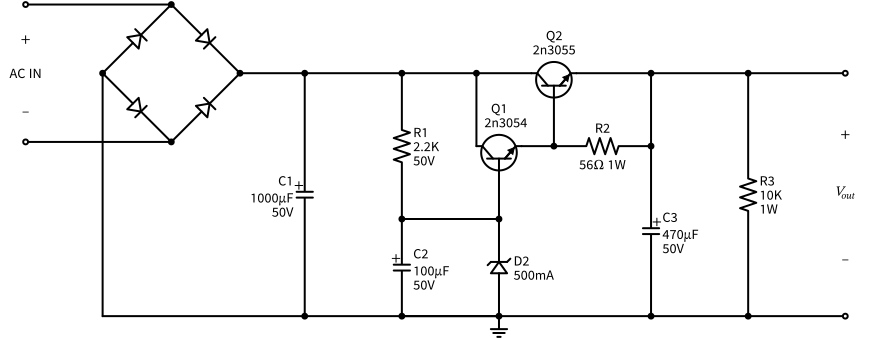

In [8]:
d = schemdraw.Drawing(inches_per_unit=.5, unit=3)
D1 = d.add(elm.Diode(theta=-45))
d.add(elm.Dot)
D2 = d.add(elm.Diode(theta=225, reverse=True))
d.add(elm.Dot)
D3 = d.add(elm.Diode(theta=135, reverse=True))
d.add(elm.Dot)
D4 = d.add(elm.Diode(theta=45))
d.add(elm.Dot)

d.add(elm.Line(d='left', xy=D3.start, l=d.unit*1.5))
d.add(elm.Dot(open=True))
G = d.add(elm.Gap(d='up', toy=D1.start, label=['–', 'AC IN', '+']))
d.add(elm.Line(d='left', xy=D4.end, tox=G.start))
d.add(elm.Dot(open=True))

top = d.add(elm.Line(d='right', xy=D2.start, l=d.unit*3))
Q2 = d.add(elm.BjtNpn(d='up', circle=True, anchor='collector', label='Q2\n2n3055'))
d.add(elm.Line(d='down', xy=Q2.base, l=d.unit/2))
Q2b = d.add(elm.Dot)
d.add(elm.Line(d='left', l=d.unit/3))
Q1 = d.add(elm.BjtNpn(d='up', circle=True, anchor='emitter', label='Q1\n    2n3054'))
d.add(elm.Line(d='up', xy=Q1.collector, toy=top.center))
d.add(elm.Dot)

d.add(elm.Line(d='down', xy=Q1.base, l=d.unit/2))
d.add(elm.Dot)
d.add(elm.Zener(d='down', reverse=True, botlabel='D2\n500mA'))
d.add(elm.Dot)
G = d.add(elm.Ground())
d.add(elm.Line(d='left'))
d.add(elm.Dot)
d.add(elm.Capacitor(d='up', polar=True, botlabel='C2\n100$\mu$F\n50V', reverse=True))
d.add(elm.Dot)
d.push()
d.add(elm.Line(d='right'))
d.pop()
d.add(elm.Resistor(d='up', toy=top.end, botlabel='R1\n2.2K\n50V'))
d.add(elm.Dot)

d.here = [d.here[0]-d.unit, d.here[1]]
d.add(elm.Dot)
d.add(elm.Capacitor(d='down', polar=True, toy=G.start, label='C1\n 1000$\mu$F\n50V', flip=True))
d.add(elm.Dot)
d.add(elm.Line(d='left', xy=G.start, tox=D4.start))
d.add(elm.Line(d='up', toy=D4.start))

d.add(elm.Resistor(d='right', xy=Q2b.center, label='R2', botlabel='56$\Omega$ 1W'))
d.add(elm.Dot())
d.push()
d.add(elm.Line(d='up', toy=top.start))
d.add(elm.Dot())
d.add(elm.Line(d='left', tox=Q2.emitter))
d.pop()
d.add(elm.Capacitor(d='down', polar=True, toy=G.start, botlabel='C3\n470$\mu$F\n50V'))
d.add(elm.Dot)
d.add(elm.Line(d='left', tox=G.start, move_cur=False))
d.add(elm.Line(d='right'))
d.add(elm.Dot)
d.add(elm.Resistor(d='up', toy=top.center, botlabel='R3\n10K\n1W'))
d.add(elm.Dot)
d.add(elm.Line(d='left', move_cur=False))
d.add(elm.Line(d='right'))
d.add(elm.Dot(open=True))
d.add(elm.Gap(d='down', toy=G.start, label=['+', '$V_{out}$', '–']))
d.add(elm.Dot(open=True))
d.add(elm.Line(d='left'))
d.draw()


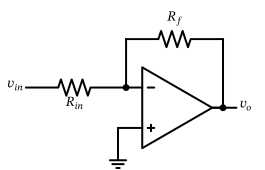

In [9]:
d = schemdraw.Drawing()
op = d.add(elm.Opamp)
d.add(elm.Line(d='left', xy=op.in2, l=d.unit/4))
d.add(elm.Line(d='down', l=d.unit/5))
d.add(elm.Ground)
d.add(elm.Line(d='left', xy=op.in1, l=d.unit/6))
d.add(elm.Dot)
d.push()
Rin = d.add(elm.Resistor(d='left', xy=Point(op.in1)-Point((d.unit/5,0)), botlabel='$R_{in}$', lftlabel='$v_{in}$'))
d.pop()
d.add(elm.Line(d='up', l=d.unit/2))
Rf = d.add(elm.Resistor(d='right', l=d.unit*1, label='$R_f$'))
d.add(elm.Line(d='down', toy=op.out))
d.add(elm.Dot)
d.add(elm.Line(d='left', tox=op.out))
d.add(elm.Line(d='right', l=d.unit/4, rgtlabel='$v_{o}$'))
d.draw()


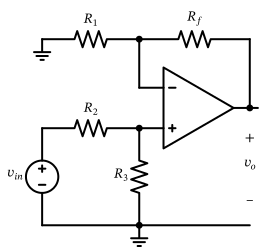

In [10]:
d = schemdraw.Drawing()
op = d.add(elm.Opamp)
d.add(elm.Line(xy=op.out, l=.75))
d.add(elm.Line(d='left', xy=op.in1, l=.75))
d.add(elm.Line(d='up', l=1.5))
d.add(elm.Dot)
R1 = d.add(elm.Resistor(d='left', label='$R_1$'))
d.add(elm.Ground)
Rf = d.add(elm.Resistor(d='right', xy=R1.start, tox=op.out+.5, label='$R_f$'))
d.add(elm.Line(d='down', toy=op.out))
dot = d.add(elm.Dot)
d.add(elm.Line(d='left', xy=op.in2, l=.75))
d.add(elm.Dot)
R3 = d.add(elm.Resistor(d='down', label='$R_3$'))
d.add(elm.Dot)
d.add(elm.Ground)
R2 = d.add(elm.Resistor(d='left', xy=R3.start, label='$R_2$'))
d.add(elm.SourceV(d='down', reverse=True, label='$v_{in}$'))
d.add(elm.Line(d='right', tox=Rf.end))
d.add(elm.Gap(d='down', xy=dot.start, toy=R3.end, label=['+','$v_o$','–']))
d.draw()

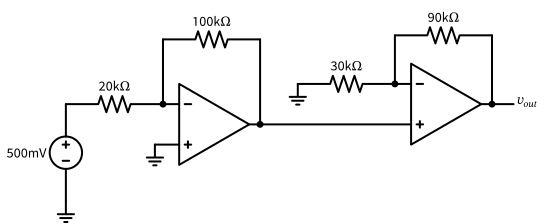

In [11]:
d = schemdraw.Drawing()
d.add(elm.Ground)
d.add(elm.SourceV(label='500mV'))

d.add(elm.Resistor(d='right', label='20k$\Omega$'))
Vin = d.add(elm.Dot)
d.add(elm.Line(l=.5))
O1 = d.add(elm.Opamp(anchor='in1'))
d.add(elm.Line(d='left', l=.75, xy=O1.in2))
d.add(elm.Ground)
d.add(elm.Line(d='up', xy=Vin.start, l=2))
d.add(elm.Resistor(d='right', label='100k$\Omega$'))
d.add(elm.Line(d='down', toy=O1.out))
d.add(elm.Dot)
d.add(elm.Line(d='right', xy=O1.out, l=5))
O2 = d.add(elm.Opamp(anchor='in2'))
Vin2 = d.add(elm.Line(d='left', l=.5, xy=O2.in1))
d.add(elm.Dot)
d.add(elm.Resistor(d='left', label='30k$\Omega$'))
d.add(elm.Ground)
d.add(elm.Line(d='up', xy=Vin2.end, l=1.5))
d.add(elm.Resistor(d='right', label='90k$\Omega$'))
d.add(elm.Line(d='down', toy=O2.out))
d.add(elm.Dot)
d.add(elm.Line(d='right', xy=O2.out, l=1, rgtlabel='$v_{out}$'))
d.draw()


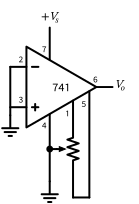

In [12]:
d = schemdraw.Drawing(fontsize=12)
op = d.add(elm.Opamp(label='741', lblloc='center', lblofst=0))
d.add(elm.Line(d='left', xy=op.in1, l=.5))
d.add(elm.Line(d='down', l=d.unit/2))
d.add(elm.Ground)
d.add(elm.Line(d='left', xy=op.in2, l=.5))
d.add(elm.Line(d='right', xy=op.out, l=.5, rgtlabel='$V_o$'))
d.add(elm.Line(d='up', xy=op.vd, l=1, rgtlabel='$+V_s$'))
trim = d.add(elm.Potentiometer(d='down', xy=op.n1, flip=True, zoom=.7))
d.add(elm.Line(d='right', tox=op.n1a))
d.add(elm.Line(d='up', to=op.n1a))
d.add(elm.Line(d='left', xy=trim.tap, tox=op.vs))
d.add(elm.Dot)
d.push()
d.add(elm.Line(d='down', l=d.unit/3))
d.add(elm.Ground)
d.pop()
d.add(elm.Line(d='up', toy=op.vs))
op.add_label('1', loc='n1', size=9, ofst=[-.1, -.25], align=('right', 'top'))
op.add_label('5', loc='n1a', size=9, ofst=[-.1, -.25], align=('right', 'top'))
op.add_label('4', loc='vs', size=9, ofst=[-.1, -.2], align=('right', 'top'))
op.add_label('7', loc='vd', size=9, ofst=[-.1, .2], align=('right', 'bottom'))
op.add_label('2', loc='in1', size=9, ofst=[-.1, .1], align=('right', 'bottom'))
op.add_label('3', loc='in2', size=9, ofst=[-.1, .1], align=('right', 'bottom'))
op.add_label('6', loc='out', size=9, ofst=[-.1, .1], align=('left', 'bottom'))
d.draw()


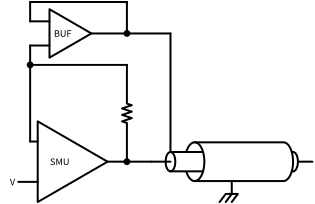

In [13]:
d = schemdraw.Drawing(fontsize=10)
d.add(elm.Line(lftlabel='V', l=d.unit/5))
smu = d.add(elm.Opamp(sign=False, anchor='in2'))
smu.add_label('SMU', ofst=[-.4, 0], loc='center', align=('center', 'center'))
d.add(elm.Line(xy=smu.out, l=d.unit/5))
d.push()
d.add(elm.Line(l=d.unit/4))
triax = d.add(elm.triax(length=5, shieldofststart=.75))
d.pop()
d.add(elm.Dot)
d.add(elm.Resistor(d='up', l=d.unit, zoom=.6))
d.add(elm.Line(d='left'))
d.add(elm.Dot)
d.push()
d.add(elm.Line(d='down', toy=smu.in1))
d.add(elm.Line(d='right', tox=smu.in1))
d.pop()
d.add(elm.Line(d='up', l=d.unit/5))
d.add(elm.Line(d='right', l=d.unit/5))
buf = d.add(elm.Opamp(sign=False, zoom=.6, anchor='in2'))
buf.add_label('BUF', ofst=[-.4, 0], loc='center', align=('center', 'center'))
d.add(elm.Line(d='left', xy=buf.in1, l=d.unit/5))
d.add(elm.Line(d='up', l=d.unit/5))
d.add(elm.Line(d='right'))
d.add(elm.Line(d='down', toy=buf.out))
d.add(elm.Dot)
d.push()
d.add(elm.Line(d='left', tox=buf.out))
d.pop()
d.add(elm.Line(d='right', tox=triax.guardstart_top))
d.add(elm.Line(d='down', toy=triax.guardstart_top))
d.add(elm.GroundChassis(xy=triax.shieldcenter))
d.draw()


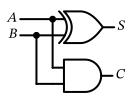

In [14]:
d = schemdraw.Drawing(unit=.5)
S = d.add(logic.Xor(rgtlabel='$S$'))
A = d.add(logic.Dot(xy=S.in1))
d.add(logic.Line(d='left', l=d.unit*2, lftlabel='$A$'))
d.add(logic.Line(d='left', xy=S.in2))
B = d.add(logic.Dot)
d.add(logic.Line(d='left', lftlabel='$B$'))

d.add(logic.Line(d='down', xy=A.start, l=d.unit*3))
C = d.add(logic.And(d='right', anchor='in1', rgtlabel='$C$'))
d.add(logic.Line(d='down', xy=B.start, toy=C.in2))
d.add(logic.Line(to=C.in2))
d.draw()


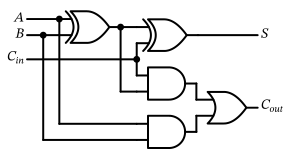

In [15]:
d = schemdraw.Drawing(unit=.5)
X1 = d.add(logic.Xor)
d.add(logic.Dot)
A = d.add(logic.Dot(xy=X1.in1))
Ain = d.add(logic.Line(d='left', l=d.unit*2, lftlabel='$A$'))
d.add(logic.Line(d='left', xy=X1.in2))
B = d.add(logic.Dot)
d.add(logic.Line(d='left', lftlabel='$B$'))

d.add(logic.Line(d='right', xy=X1.out, l=d.unit))
X2 = d.add(logic.Xor(anchor='in1'))
C = d.add(logic.Line(d='down', xy=X2.in2, l=d.unit*2))
d.push()
d.add(logic.Dot(xy=C.center))
d.add(logic.Line(d='left', tox=Ain.end, lftlabel='$C_{in}$'))
d.pop()

A1 = d.add(logic.And(d='right', anchor='in1'))
d.add(logic.Line(d='left', xy=A1.in2, tox=X1.out))
d.add(logic.Line(d='up', toy=X1.out))
A2 = d.add(logic.And(d='right', anchor='in1', xy=[A1.in1[0],A1.in2[1]-d.unit*2]))
d.add(logic.Line(d='left', xy=A2.in1, tox=A.start))
d.add(logic.Line(d='up', toy=A.start))
d.add(logic.Line(d='left', xy=A2.in2, tox=B.start))
d.add(logic.Line(d='up', toy=B.start))

O1 = d.add(logic.Or(d='right', xy=[A1.out[0],(A1.out[1]+A2.out[1])/2], rgtlabel='$C_{out}$'))
d.add(logic.Line(d='down', xy=A1.out, toy=O1.in1))
d.add(logic.Line(d='up', xy=A2.out, toy=O1.in2))
d.add(logic.Line(d='right', xy=X2.out, tox=O1.out, rgtlabel='$S$'))
d.draw()


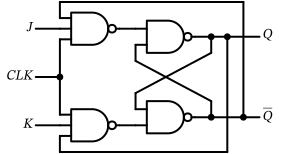

In [16]:
d = schemdraw.Drawing()
# Two front gates (SR latch)
G1 = d.add(logic.Nand(anchor='in1'))
d.add(logic.Line(l=d.unit/6))
Q1 = d.add(logic.Dot)
d.add(logic.Line(l=d.unit/6))
Q2 = d.add(logic.Dot)
d.add(logic.Line(l=d.unit/3, rgtlabel='$Q$'))
G2 = d.add(logic.Nand(anchor='in1', xy=[G1.in1[0],G1.in1[1]-2.5]))
d.add(logic.Line(l=d.unit/6))
Qb = d.add(logic.Dot)
d.add(logic.Line(l=d.unit/3))
Qb2 = d.add(logic.Dot)
d.add(logic.Line(l=d.unit/6, rgtlabel='$\overline{Q}$'))
S1 = d.add(logic.Line(xy=G2.in1, d='up', l=d.unit/6))
d.add(logic.Line(d='down', xy=Q1.start, l=d.unit/6))
d.add(logic.Line(to=S1.end))
R1 = d.add(logic.Line(d='down', xy=G1.in2, l=d.unit/6))
d.add(logic.Line(d='up', xy=Qb.start, l=d.unit/6))
d.add(logic.Line(to=R1.end))

# Two back gates
d.add(logic.Line(d='left', xy=G1.in1, l=d.unit/6))
J = d.add(logic.Nand(inputs=3, anchor='out', reverse=True))
d.add(logic.Line(d='up', xy=J.in3, l=d.unit/6))
d.add(logic.Line(d='right', tox=Qb2.start))
d.add(logic.Line(d='down', toy=Qb2.start))
d.add(logic.Line(d='left', xy=J.in2, l=d.unit/4, lftlabel='$J$'))
d.add(logic.Line(d='left', xy=G2.in2, l=d.unit/6))
K = d.add(logic.Nand(inputs=3, anchor='out', reverse=True))
d.add(logic.Line(d='down', xy=K.in1, l=d.unit/6))
d.add(logic.Line(d='right', tox=Q2.start))
d.add(logic.Line(d='up', toy=Q2.start))
d.add(logic.Line(d='left', xy=K.in2, l=d.unit/4, lftlabel='$K$'))
C = d.add(logic.Line(d='down', xy=J.in1, toy=K.in3))
d.add(logic.Dot(xy=C.center))
d.add(logic.Line(d='left', xy=C.center, l=d.unit/4, lftlabel='$CLK$'))
d.draw()


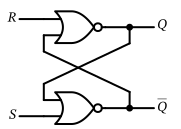

In [17]:
d = schemdraw.Drawing()
d.add(logic.Line(l=d.unit/4, lftlabel='$R$'))
G1 = d.add(logic.Nor(anchor='in1'))
d.add(logic.Line(l=d.unit/4))
Q = d.add(logic.Dot)
d.add(logic.Line(l=d.unit/4, rgtlabel='$Q$'))

G2 = d.add(logic.Nor(anchor='in1', xy=[G1.in1[0],G1.in1[1]-2.5]))
d.add(logic.Line(l=d.unit/4))
Qb = d.add(logic.Dot)
d.add(logic.Line(l=d.unit/4, rgtlabel='$\overline{Q}$'))
S1 = d.add(logic.Line(d='up', xy=G2.in1, l=d.unit/6))
d.add(logic.Line(d='down', xy=Q.start, l=d.unit/6))
d.add(logic.Line(to=S1.end))
R1 = d.add(logic.Line(d='down', xy=G1.in2, l=d.unit/6))
d.add(logic.Line(d='up', xy=Qb.start, l=d.unit/6))
d.add(logic.Line(to=R1.end))
d.add(logic.Line(d='left', xy=G2.in2, l=d.unit/4, lftlabel='$S$'))
d.draw()


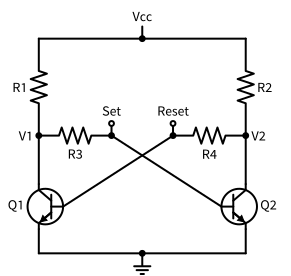

In [18]:
d = schemdraw.Drawing()
Q1 = d.add(elm.BjtNpn(circle=True, reverse=True, lftlabel='Q1'))
Q2 = d.add(elm.BjtNpn(circle=True, xy=[d.unit*2, 0], label='Q2'))
d.add(elm.Line(d='up', xy=Q1.collector, l=d.unit/2))

R1 = d.add(elm.Resistor(d='up', label='R1', move_cur=False))
d.add(elm.Dot(lftlabel='V1'))
d.add(elm.Resistor(d='right', botlabel='R3', l=d.unit*.75))
d.add(elm.Dot)
d.push()
d.add(elm.Line(d='up', l=d.unit/8))
d.add(elm.Dot(open=True, label='Set'))
d.pop()
d.add(elm.Line(to=Q2.base))

d.add(elm.Line(d='up', xy=Q2.collector, l=d.unit/2))
d.add(elm.Dot(rgtlabel='V2'))
R2 = d.add(elm.Resistor(d='up', botlabel='R2', move_cur=False))
d.add(elm.Resistor(d='left', botlabel='R4', l=d.unit*.75))
d.add(elm.Dot)
d.push()
d.add(elm.Line(d='up', l=d.unit/8))
d.add(elm.Dot(open=True, label='Reset'))
d.pop()
d.add(elm.Line(to=Q1.base))

d.add(elm.Line(d='down', xy=Q1.emitter, l=d.unit/4))
BOT = d.add(elm.Line(d='right', tox=Q2.emitter))
d.add(elm.Line(to=Q2.emitter))
d.add(elm.Dot(xy=BOT.center))
d.add(elm.Ground(xy=BOT.center))

TOP = d.add(elm.Line(endpts=[R1.end,R2.end]))
d.add(elm.Dot(xy=TOP.center))
d.add(elm.Line(d='up', xy=TOP.center, l=d.unit/8, rgtlabel='Vcc'))
d.draw()

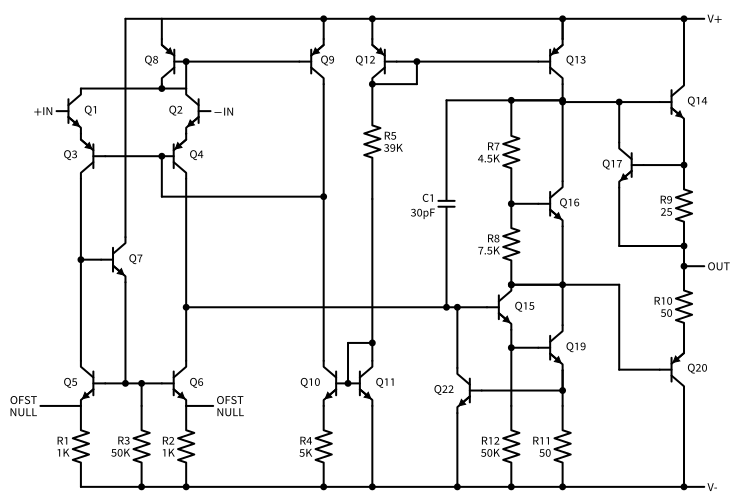

In [19]:
d = schemdraw.Drawing(fontsize=12, unit=2.5)
Q1 = d.add(elm.BjtNpn(label='Q1', lftlabel='+IN'))
Q3 = d.add(elm.BjtPnp(d='l', xy=Q1.emitter, anchor='emitter', lftlabel='Q3', flip=True))
d.add(elm.Line(d='d', xy=Q3.collector))
d.add(elm.Dot)
d.push()
d.add(elm.Line(d='r', l=d.unit/4))
Q7 = d.add(elm.BjtNpn(anchor='base', label='Q7'))
d.pop()
d.add(elm.Line(d='d', l=d.unit*1.25))
Q5 = d.add(elm.BjtNpn(d='l', anchor='collector', flip=True, lftlabel='Q5'))
d.add(elm.Line(d='l', xy=Q5.emitter, l=d.unit/2, lftlabel='OFST\nNULL', move_cur=False))
d.add(elm.Resistor(d='d', xy=Q5.emitter, label='R1\n1K'))
d.add(elm.Line(d='r', l=d.unit*.75))
d.add(elm.Dot)
R3 = d.add(elm.Resistor(d='u', label='R3\n50K'))
d.add(elm.Line(toy=Q5.base))
d.add(elm.Dot)
d.push()
d.add(elm.Line(d='l', to=Q5.base))
d.add(elm.Line(d='d', xy=Q7.emitter, toy=Q5.base))
d.add(elm.DOT)
d.pop()
d.add(elm.Line(d='right', l=d.unit/4))
Q6 = d.add(elm.BjtNpn(anchor='base', label='Q6'))
d.add(elm.Line(xy=Q6.emitter, l=d.unit/3, rgtlabel='\nOFST\nNULL', move_cur=False))
d.add(elm.Resistor(d='d', xy=Q6.emitter, label='R2\n1K'))
d.add(elm.Dot)

d.add(elm.Line(d='u', xy=Q6.collector, toy=Q3.collector))
Q4 = d.add(elm.BjtPnp(d='r', anchor='collector', label='Q4'))
d.add(elm.Line(d='l', xy=Q4.base, tox=Q3.base))
d.add(elm.Line(d='u', xy=Q4.emitter, toy=Q1.emitter))
Q2 = d.add(elm.BjtNpn(d='l', anchor='emitter', flip=True, lftlabel='Q2', rgtlabel='$-$IN'))
d.add(elm.Line(d='u', xy=Q2.collector, l=d.unit/3))
d.add(elm.Dot)
Q8 = d.add(elm.BjtPnp(d='l', lftlabel='Q8', anchor='base', flip=True))
d.add(elm.Line(d='d', xy=Q8.collector, toy=Q2.collector))
d.add(elm.Dot)
d.add(elm.Line(d='l', xy=Q2.collector, tox=Q1.collector))
d.add(elm.Line(d='u', xy=Q8.emitter, l=d.unit/4))
top = d.add(elm.Line(d='l', tox=Q7.collector))
d.add(elm.Line(d='d', toy=Q7.collector))

d.add(elm.Line(d='r', xy=top.start, l=d.unit*2))
d.add(elm.Line(d='d', l=d.unit/4))
Q9 = d.add(elm.BjtPnp(d='r', anchor='emitter', label='Q9', lblofst=-.1))
d.add(elm.Line(d='l', xy=Q9.base, tox=Q8.base))
d.add(elm.Dot(xy=Q4.base))
d.add(elm.Line(d='d', xy=Q4.base, l=d.unit/2))
d.add(elm.Line(d='r', tox=Q9.collector))
d.add(elm.Dot)
d.add(elm.Line(d='d', xy=Q9.collector, toy=Q6.collector))
Q10 = d.add(elm.BjtNpn(d='l', anchor='collector', flip=True, lftlabel='Q10'))
d.add(elm.Resistor(d='d', xy=Q10.emitter, toy=R3.start, label='R4\n5K'))
d.add(elm.Dot)

Q11 = d.add(elm.BjtNpn(d='r', xy=Q10.base, anchor='base', label='Q11'))
d.add(elm.Dot(xy=Q11.base))
d.add(elm.Line(d='u', l=d.unit/2))
d.add(elm.Line(d='r', tox=Q11.collector))
d.add(elm.Dot)
d.add(elm.Line(d='d', xy=Q11.emitter, toy=R3.start))
d.add(elm.Dot)
d.add(elm.Line(d='u', xy=Q11.collector, l=d.unit*2))
d.add(elm.Resistor(toy=Q9.collector, botlabel='R5\n39K'))
Q12 = d.add(elm.BjtPnp(d='l', anchor='collector', flip=True, lftlabel='Q12', lblofst=-.1))
d.add(elm.Line(d='u', xy=Q12.emitter, l=d.unit/4))
d.add(elm.Dot)
d.add(elm.Line(d='l', tox=Q9.emitter))
d.add(elm.Dot)
d.add(elm.Line(d='r', xy=Q12.base, l=d.unit/4))
d.add(elm.Dot)
d.push()
d.add(elm.Line(d='d', toy=Q12.collector))
d.add(elm.Line(d='l', tox=Q12.collector))
d.add(elm.Dot)
d.pop()
d.add(elm.Line(d='r', l=d.unit*1.5))
Q13 = d.add(elm.BjtPnp(anchor='base', label='Q13'))
d.add(elm.Line(d='u', l=d.unit/4))
d.add(elm.Dot)
d.add(elm.Line(d='l', tox=Q12.emitter))
K = d.add(elm.Line(d='d', xy=Q13.collector, l=d.unit/5))
d.add(elm.Dot)
d.add(elm.Line(d='d'))
Q16 = d.add(elm.BjtNpn(d='r', anchor='collector', label='Q16', lblofst=-.1))
d.add(elm.Line(d='l', xy=Q16.base, l=d.unit/3))
d.add(elm.Dot)
R7 = d.add(elm.Resistor(d='u', toy=K.end, label='R7\n4.5K'))
d.add(elm.Dot)
d.add(elm.Line(d='r', tox=Q13.collector, move_cur=False))
R8 = d.add(elm.Resistor(d='d', xy=R7.start, label='R8\n7.5K'))
d.add(elm.Dot)
d.add(elm.Line(d='r', tox=Q16.emitter))
J = d.add(elm.Dot)
d.add(elm.Line(d='u', toy=Q16.emitter))
Q15 = d.add(elm.BjtNpn(d='r', anchor='collector', xy=R8.end, label='Q15'))
d.add(elm.Line(d='l', xy=Q15.base, l=d.unit/2))
d.add(elm.Dot)
C1 = d.add(elm.Capacitor(d='u', toy=R7.end, label='C1\n30pF'))
d.add(elm.Line(d='r', tox=Q13.collector))
d.add(elm.Line(d='l', xy=C1.start, tox=Q6.collector))
d.add(elm.Dot)
d.add(elm.Line(d='d', xy=J.center, l=d.unit/2))
Q19 = d.add(elm.BjtNpn(d='r', anchor='collector', label='Q19'))
d.add(elm.Line(d='l', xy=Q19.base, tox=Q15.emitter))
d.add(elm.Dot)
d.add(elm.Line(d='u', toy=Q15.emitter, move_cur=False))
d.add(elm.Line(d='d', xy=Q19.emitter, l=d.unit/4))
d.add(elm.Dot)
d.add(elm.Line(d='left'))
Q22 = d.add(elm.BjtNpn(d='l', anchor='base', flip=True, lftlabel='Q22'))
d.add(elm.Line(d='u', xy=Q22.collector, toy=Q15.base))
d.add(elm.Dot)
d.add(elm.Line(d='d', xy=Q22.emitter, toy=R3.start))
d.add(elm.Dot)
d.add(elm.Line(d='l', tox=R3.start, move_cur=False))
d.add(elm.Line(d='r', tox=Q15.emitter))
d.add(elm.Dot)
d.push()
d.add(elm.Resistor(d='u', label='R12\n50K'))
d.add(elm.Line(toy=Q19.base))
d.pop()
d.add(elm.Line(tox=Q19.emitter))
d.add(elm.Dot)
R11 = d.add(elm.Resistor(d='u', label='R11\n50'))
d.add(elm.Line(toy=Q19.emitter))

d.add(elm.Line(d='u', xy=Q13.emitter, l=d.unit/4))
d.add(elm.Line(d='r', l=d.unit*1.5))
d.add(elm.Dot)
d.add(elm.Line(l=d.unit/4, rgtlabel='V+', move_cur=False))
d.add(elm.Line(d='d', l=d.unit*.75))
Q14 = d.add(elm.BjtNpn(d='r', anchor='collector', label='Q14'))
d.add(elm.Line(d='l', xy=Q14.base, l=d.unit/2))
d.push()
d.add(elm.Dot)
d.add(elm.Line(d='d', l=d.unit/2))
Q17 = d.add(elm.BjtNpn(d='l', anchor='collector', flip=True, lftlabel='Q17', lblofst=-.1))
d.add(elm.Line(d='r', xy=Q17.base, tox=Q14.emitter))
d.add(elm.Dot)
J = d.add(elm.Line(d='u', toy=Q14.emitter))
d.pop()
d.add(elm.Line(tox=Q13.collector))
d.add(elm.Dot)
d.add(elm.Resistor(d='d', xy=J.start, label='R9\n25'))
d.add(elm.Dot)
d.push()
d.add(elm.Line(d='l', tox=Q17.emitter))
d.add(elm.Line(d='u', toy=Q17.emitter))
d.pop()
d.add(elm.Line(d='d', l=d.unit/4))
d.add(elm.Dot)
d.add(elm.Line(d='r', l=d.unit/4, rgtlabel='OUT', move_cur=False))
d.add(elm.Resistor(d='d', label='R10\n50'))
Q20 = d.add(elm.BjtPnp(d='r', anchor='emitter', label='Q20'))
d.add(elm.Line(d='l', xy=Q20.base, l=d.unit/2))
d.add(elm.Line(d='u', toy=Q15.collector))
d.add(elm.Line(d='l', tox=Q15.collector))
d.add(elm.Dot)
d.add(elm.Line(d='d', xy=Q20.collector, toy=R3.start))
d.add(elm.Dot)
d.add(elm.Line(d='r', l=d.unit/4, rgtlabel='V-', move_cur=False))
d.add(elm.Line(d='l', tox=R11.start))
d.draw()


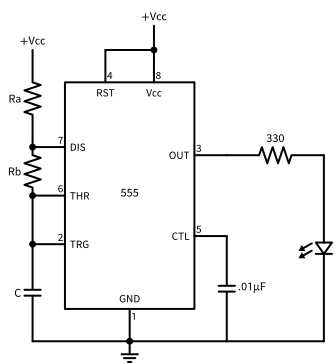

In [20]:
d = schemdraw.Drawing(fontsize=12)
IC555def = elm.Ic(pins=[elm.IcPin(name='TRG', side='left', pin='2'),
                        elm.IcPin(name='THR', side='left', pin='6'),
                        elm.IcPin(name='DIS', side='left', pin='7'),
                        elm.IcPin(name='CTL', side='right', pin='5'),
                        elm.IcPin(name='OUT', side='right', pin='3'),
                        elm.IcPin(name='RST', side='top', pin='4'),
                        elm.IcPin(name='Vcc', side='top', pin='8'),
                        elm.IcPin(name='GND', side='bot', pin='1'),],
                   edgepadW=.5,
                   edgepadH=1,
                   pinspacing=1.5,
                   leadlen=1,
                   label='555')
T = d.add(IC555def)
BOT = d.add(elm.Ground(xy=T.GND))
d.add(elm.Dot)
d.add(elm.Resistor(endpts=[T.DIS, T.THR], label='Rb'))
d.add(elm.Resistor(d='u', xy=T.DIS, label='Ra', rgtlabel='+Vcc'))
d.add(elm.Line(endpts=[T.THR, T.TRG]))
d.add(elm.Capacitor(d='d', xy=T.TRG, toy=BOT.start, label='C', l=d.unit/2))
d.add(elm.Line(d='r', tox=BOT.start))
d.add(elm.Capacitor(d='d', xy=T.CTL, toy=BOT.start, botlabel='.01$\mu$F'))
d.add(elm.Dot(xy=T.DIS))
d.add(elm.Dot(xy=T.THR))
d.add(elm.Dot(xy=T.TRG))
d.add(elm.Line(endpts=[T.RST,T.Vcc]))
d.add(elm.Dot)
d.add(elm.Line(d='u', l=d.unit/4, rgtlabel='+Vcc'))
d.add(elm.Resistor(d='r', xy=T.OUT, label='330'))
d.add(elm.LED(flip=True, d='down', toy=BOT.start))
d.add(elm.Line(d='l', tox=BOT.start))
d.draw()


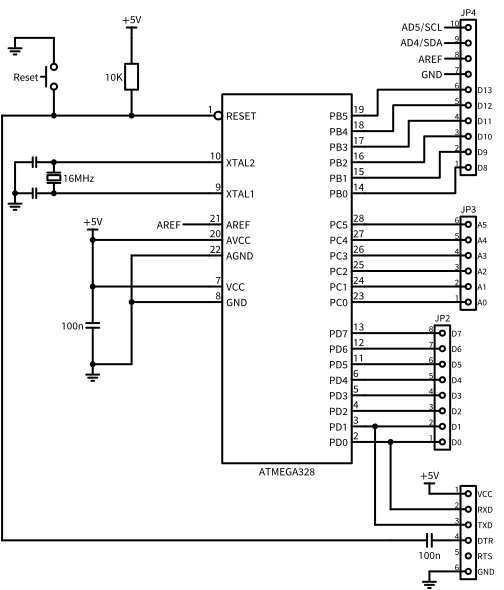

In [21]:
class Atmega328(elm.Ic):
    def __init__(self, *args, **kwargs):
        pins=[elm.IcPin(name='PD0', pin='2', side='r', slot='1/22'),
              elm.IcPin(name='PD1', pin='3', side='r', slot='2/22'),
              elm.IcPin(name='PD2', pin='4', side='r', slot='3/22'),
              elm.IcPin(name='PD3', pin='5', side='r', slot='4/22'),
              elm.IcPin(name='PD4', pin='6', side='r', slot='5/22'),
              elm.IcPin(name='PD5', pin='11', side='r', slot='6/22'),             
              elm.IcPin(name='PD6', pin='12', side='r', slot='7/22'),             
              elm.IcPin(name='PD7', pin='13', side='r', slot='8/22'),
              elm.IcPin(name='PC0', pin='23', side='r', slot='10/22'),
              elm.IcPin(name='PC1', pin='24', side='r', slot='11/22'),
              elm.IcPin(name='PC2', pin='25', side='r', slot='12/22'),
              elm.IcPin(name='PC3', pin='26', side='r', slot='13/22'),
              elm.IcPin(name='PC4', pin='27', side='r', slot='14/22'),
              elm.IcPin(name='PC5', pin='28', side='r', slot='15/22'),
              elm.IcPin(name='PB0', pin='14', side='r', slot='17/22'),
              elm.IcPin(name='PB1', pin='15', side='r', slot='18/22'),
              elm.IcPin(name='PB2', pin='16', side='r', slot='19/22'),
              elm.IcPin(name='PB3', pin='17', side='r', slot='20/22'),
              elm.IcPin(name='PB4', pin='18', side='r', slot='21/22'),
              elm.IcPin(name='PB5', pin='19', side='r', slot='22/22'),
    
              elm.IcPin(name='RESET', side='l', slot='22/22', invert=True, pin='1'),
              elm.IcPin(name='XTAL2', side='l', slot='19/22', pin='10'),
              elm.IcPin(name='XTAL1', side='l', slot='17/22', pin='9'),
              elm.IcPin(name='AREF', side='l', slot='15/22', pin='21'),
              elm.IcPin(name='AVCC', side='l', slot='14/22', pin='20'),
              elm.IcPin(name='AGND', side='l', slot='13/22', pin='22'),
              elm.IcPin(name='VCC', side='l', slot='11/22', pin='7'),
              elm.IcPin(name='GND', side='l', slot='10/22', pin='8')]
        super().__init__(pins=pins, w=5, plblofst=.05, botlabel='ATMEGA328', **kwargs)


d = schemdraw.Drawing(fontsize=11, inches_per_unit=.4)
Q1 = d.add(Atmega328())
JP4 = d.add(elm.Header(rows=10, shownumber=True, flip=True, at=[Q1.PB5[0]+4, Q1.PB5[1]+1], anchor='pin6', label='JP4', fontsize=10,
                       pinsright=['D8', 'D9', 'D10', 'D11', 'D12', 'D13', '', '', '', ''], pinalignright='center'))
JP3 = d.add(elm.Header(rows=6, shownumber=True, flip=True, at=[Q1.PC5[0]+4, Q1.PC5[1]], anchor='pin6', label='JP3', fontsize=10,
                       pinsright=['A0', 'A1', 'A2', 'A3', 'A4', 'A5'], pinalignright='center'))

JP2 = d.add(elm.Header(rows=8, shownumber=True, flip=True, at=[Q1.PD7[0]+3, Q1.PD7[1]], anchor='pin8', label='JP2', fontsize=10,
                       pinsright=['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7'], pinalignright='center'))

d.add(elm.OrthoLines(at=Q1.PB5, to=JP4.pin6, n=6))
d.add(elm.OrthoLines(at=Q1.PC5, to=JP3.pin6, n=6))
d.add(elm.OrthoLines(at=Q1.PD7, to=JP2.pin8, n=8))

d.add(elm.Line(d='l', at=JP4.pin7, l=.9, lftlabel='GND'))
d.add(elm.Line(d='l', at=JP4.pin8, l=.9, lftlabel='AREF'))
d.add(elm.Line(d='l', at=JP4.pin9, l=.9, lftlabel='AD4/SDA'))
d.add(elm.Line(d='l', at=JP4.pin10, l=.9, lftlabel='AD5/SCL'))

JP1 = d.add(elm.Header(d='r', at=[Q1.PD0[0]+4, Q1.PD0[1]-2], rows=6, anchor='pin1', shownumber=True,
                       pinsright=['VCC', 'RXD', 'TXD', 'DTR', 'RTS', 'GND'], pinalignright='center'))
d.add(elm.Line(d='l', at=JP1.pin1, l=d.unit/2))
d.add(elm.Vdd(label='+5V'))
d.add(elm.Line(d='l', at=JP1.pin2, l=d.unit))
d.add(elm.Line(d='u', toy=Q1.PD0))
d.add(elm.Dot)
d.add(elm.Line(d='l', at=JP1.pin3, l=d.unit+0.6))
d.add(elm.Line(d='u', toy=Q1.PD1))
d.add(elm.Dot)
d.add(elm.Line(d='l', at=JP1.pin6, l=d.unit/2))
d.add(elm.Ground)

d.add(elm.Line(d='l', at=Q1.XTAL2, l=d.unit*2))
d.add(elm.Dot)
d.push()
d.add(elm.Capacitor(d='l', zoom=.75, l=d.unit/2))
d.add(elm.Line(d='d', toy=Q1.XTAL1))
d.add(elm.Dot)
d.add(elm.Ground)
d.add(elm.Capacitor(d='r', zoom=.75, l=d.unit/2))
d.add(elm.Dot)
d.pop()
d.add(elm.Crystal(d='d', botlabel='16MHz', toy=Q1.XTAL1))
d.add(elm.Line(d='r', tox=Q1.XTAL1))

d.add(elm.Line(d='l', at=Q1.AREF, l=d.unit/3, lftlabel='AREF'))
d.add(elm.Line(d='l', at=Q1.AVCC, l=1.5*d.unit))
d.add(elm.Vdd(label='+5V'))
d.add(elm.Dot)
d.add(elm.Line(d='d', toy=Q1.VCC))
d.add(elm.Dot)
d.add(elm.Line(d='r', tox=Q1.VCC, move_cur=False))
d.add(elm.Capacitor(d='d', label='100n'))
GND = d.add(elm.Ground)

d.add(elm.Line(d='l', at=Q1.AGND))
d.add(elm.Line(d='d', toy=Q1.GND))
d.add(elm.Dot)
d.add(elm.Line(d='r', tox=Q1.GND, move_cur=False))
d.add(elm.Line(d='d', toy=GND.xy))
d.add(elm.Line(d='l', tox=GND.xy))
d.add(elm.Dot)

d.add(elm.Line(d='l', at=Q1.RESET))
d.add(elm.Dot)
d.push()
d.add(elm.RBox(d='u', label='10K'))
d.add(elm.Vdd(label='+5V'))
d.pop()
d.add(elm.Line(d='l'))
d.push()
d.add(elm.Dot)
RST = d.add(elm.Button(d='up', label='Reset'))
d.add(elm.Line(d='l', l=d.unit/2))
d.add(elm.Ground)
d.pop()

d.add(elm.Capacitor(d='l', at=JP1.pin4, botlabel='100n'))
d.add(elm.Line(d='l', tox=RST.start[0]-2))
d.add(elm.Line(d='u', toy=Q1.RESET))
d.add(elm.Line(d='r', tox=RST.start))

d.draw()

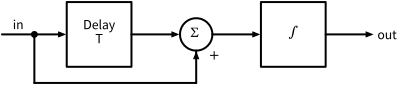

In [22]:
    d = schemdraw.Drawing()
    d.add(dsp.Line(l=d.unit/3, label='in'))
    inpt = d.add(dsp.Dot)
    d.add(dsp.Arrow(l=d.unit/3))
    delay = d.add(dsp.Box(w=2, h=2, label='Delay\nT', anchor='W'))
    d.add(dsp.Arrow(d='right', l=d.unit/2, xy=delay.E))
    sm = d.add(dsp.SumSigma)
    d.add(dsp.Arrow(xy=sm.E, l=d.unit/2))
    intg = d.add(dsp.Box(w=2, h=2, label='$\int$', anchor='W'))
    d.add(dsp.Arrow(d='r', xy=intg.E, l=d.unit/2).label('out', loc='right'))
    d.add(dsp.Line(d='down', xy=inpt.center, l=d.unit/2))
    d.add(dsp.Line(d='right', tox=sm.S))
    d.add(dsp.Line(d='up', toy=sm.S))
    d.add(dsp.Arrowhead(botlabel='+'))
    d.draw()


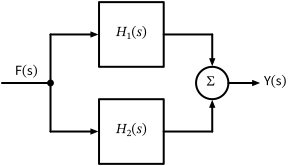

In [23]:
d = schemdraw.Drawing(fontsize=14)
d.add(dsp.Line(l=d.unit/2, label='F(s)'))
d.push()
d.add(dsp.Dot)
d.add(dsp.Line(d='up', l=d.unit/2))
d.add(dsp.Arrow(d='right', l=d.unit/2))
h1 = d.add(dsp.Box(w=2, h=2, label='$H_1(s)$', anchor='W'))
d.pop()
d.add(dsp.Line(d='down', l=d.unit/2))
d.add(dsp.Arrow(d='right', l=d.unit/2))
h2 = d.add(dsp.Box(w=2, h=2, label='$H_2(s)$', anchor='W'))
sm = d.add(dsp.SumSigma(d='right', xy=[h1.E[0] + d.unit/2, 0], anchor='center'))
d.add(dsp.Line(d='right', xy=h1.E, tox=sm.N))
d.add(dsp.Arrow(d='down', toy=sm.N))
d.add(dsp.Line(d='right', xy=h2.E, tox=sm.S))
d.add(dsp.Arrow(d='up', toy=sm.S))
d.add(dsp.Arrow(d='right', xy=sm.E, l=d.unit/3).label('Y(s)', loc='right'))
d.draw()

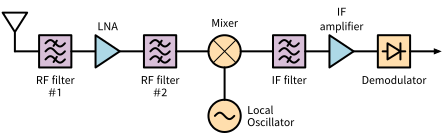

In [24]:
    d = schemdraw.Drawing(fontsize=12)
    d.add(dsp.Antenna)
    d.add(dsp.Line(d='right', l=d.unit/4))
    filt1 = d.add(dsp.Filter(response='bp', botlabel='RF filter\n#1', anchor='W', lblofst=.2, fill='thistle'))
    d.add(dsp.Line(xy=filt1.E, l=d.unit/4))
    d.add(dsp.Amp(label='LNA', fill='lightblue'))
    d.add(dsp.Line(l=d.unit/4))
    filt2 = d.add(dsp.Filter(response='bp', botlabel='RF filter\n#2', anchor='W', lblofst=.2, fill='thistle'))
    d.add(dsp.Line(d='right', xy=filt2.E, l=d.unit/3))
    mix = d.add(dsp.Mixer(label='Mixer', fill='navajowhite'))
    d.add(dsp.Line(d='down', xy=mix.S, l=d.unit/3))
    d.add(dsp.Oscillator(d='right', rgtlabel='Local\nOscillator', lblofst=.2, anchor='N', fill='navajowhite'))
    d.add(dsp.Line(d='right', xy=mix.E, l=d.unit/3))
    filtIF = d.add(dsp.Filter(response='bp', anchor='W', botlabel='IF filter', lblofst=.2, fill='thistle'))
    d.add(dsp.Line(d='right', xy=filtIF.E, l=d.unit/4))
    d.add(dsp.Amp(label='IF\namplifier', fill='lightblue'))
    d.add(dsp.Line(l=d.unit/4))
    demod = d.add(dsp.Demod(anchor='W', botlabel='Demodulator', lblofst=.2, fill='navajowhite'))
    d.add(dsp.Arrow(d='right', xy=demod.E, l=d.unit/3))
    d.draw()

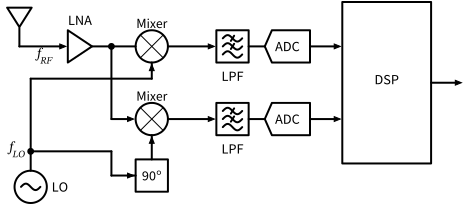

In [25]:
d = schemdraw.Drawing()
d.add(dsp.Antenna)
d.add(dsp.Arrow(d='right', l=d.unit/2, botlabel='$f_{RF}$'))
d.add(dsp.Amp(label='LNA'))
d.add(dsp.Line(d='right', l=d.unit/5))
d.add(dsp.Dot)
d.push()
d.add(dsp.Line(l=d.unit/4))
mix1 = d.add(dsp.Mixer(label='Mixer', lblofst=0))
d.add(dsp.Arrow(l=d.unit/2))
lpf1 = d.add(dsp.Filter(response='lp', botlabel='LPF', lblofst=.2))
d.add(dsp.Line(l=d.unit/6))
adc1 = d.add(dsp.Adc(label='ADC'))
d.add(dsp.Arrow(l=d.unit/3))
dsp1 = d.add(dsp.Ic(pins=[dsp.IcPin(side='L'), dsp.IcPin(side='L'), dsp.IcPin(side='R')],
                    size=(2.75, 5), leadlen=0, anchor='inL2', label='DSP'))
d.add(dsp.Arrow(xy=dsp1.inR1, l=d.unit/3))
d.pop()

d.add(dsp.Line(d='down', toy=dsp1.inL1))
d.add(dsp.Arrow(d='right', tox=mix1.W))
mix2 = d.add(dsp.Mixer(label='Mixer', lblofst=0))
d.add(dsp.Arrow(tox=lpf1.W))
d.add(dsp.Filter(response='lp', botlabel='LPF', lblofst=.2))
d.add(dsp.Line(tox=adc1.W))
d.add(dsp.Adc(label='ADC'))
d.add(dsp.Arrow(to=dsp1.inL1))

d.add(dsp.Arrowhead(xy=mix1.S, d='up'))
d.add(dsp.Line(d='down', xy=mix1.S, l=d.unit/6))
d.add(dsp.Line(d='left', l=d.unit*1.25))
d.add(dsp.Line(d='down', l=d.unit*.75))
flo = d.add(dsp.Dot(lftlabel='$f_{LO}$'))
d.push()
d.add(dsp.Line(d='down', l=d.unit/5))
d.add(dsp.Oscillator(d='right', rgtlabel='LO', anchor='N', lblofst=.15))
d.pop()
d.add(dsp.Arrowhead(d='up', xy=mix2.S))
d.add(dsp.Line(d='down', xy=mix2.S, l=d.unit/4))
b1 = d.add(dsp.Square(d='right', label='90°', anchor='N'))
d.add(dsp.Arrowhead(d='right', xy=b1.W))
d.add(dsp.Line(d='left', xy=b1.W, l=d.unit/4))
d.add(dsp.Line(d='up', toy=flo.center))
d.add(dsp.Line(d='left', tox=flo.center))
d.draw()


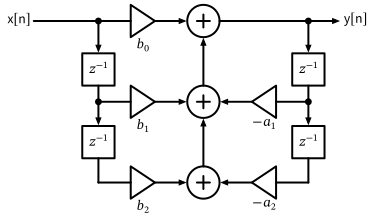

In [26]:
d = schemdraw.Drawing(unit=1, fontsize=14)
d.add(dsp.Line(lftlabel='x[n]', l=d.unit*2))
d.add(dsp.Dot)

d.push()
d.add(dsp.Line(d='right'))
d.add(dsp.Amp(botlabel='$b_0$'))
d.add(dsp.Arrow)
s0 = d.add(dsp.Sum(anchor='W'))
d.pop()

d.add(dsp.Arrow(d='down'))
z1 = d.add(dsp.Square(label='$z^{-1}$'))
d.add(dsp.Line(l=d.unit/2))
d.add(dsp.DOT)

d.push()
d.add(dsp.Line(d='right'))
d.add(dsp.Amp(botlabel='$b_1$'))
d.add(dsp.Arrow)
s1 = d.add(dsp.Sum(anchor='W'))
d.pop()

d.add(dsp.Arrow(d='down', l=d.unit*.75))
d.add(dsp.Square(label='$z^{-1}$'))
d.add(dsp.Line(l=d.unit*.75))
d.add(dsp.Line(d='right'))
d.add(dsp.Amp(botlabel='$b_2$'))
d.add(dsp.Arrow)
s2 = d.add(dsp.Sum(anchor='W'))

d.add(dsp.Arrow(d='up', xy=s2.N, toy=s1.S))
d.add(dsp.Arrow(d='up', xy=s1.N, toy=s0.S))

d.add(dsp.LineDot(d='right', xy=s0.E, l=d.unit*2.75))
d.push()
d.add(dsp.Arrow(d='right', rgtlabel='y[n]'))
d.pop()
d.add(dsp.Arrow(d='down'))
d.add(dsp.Square(label='$z^{-1}$'))
d.add(dsp.Line(l=d.unit/2))
d.add(dsp.Dot)
d.push()
d.add(dsp.Line(d='left'))
a1 = d.add(dsp.Amp(botlabel='$-a_1$'))
d.add(dsp.Arrow(xy=a1.out, tox=s1.E))
d.pop()

d.add(dsp.Arrow(d='down', l=d.unit*.75))
d.add(dsp.Square(label='$z^{-1}$'))
d.add(dsp.Line(l=d.unit*.75))
d.add(dsp.Line(d='left'))
a1 = d.add(dsp.Amp(botlabel='$-a_2$'))
d.add(dsp.Arrow(xy=a1.out, tox=s2.E))
d.draw()


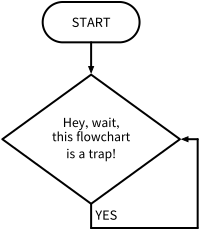

In [27]:
d = schemdraw.Drawing()
d.add(flow.Start(label='START'))
d.add(flow.Arrow(d='down', l=d.unit/3))
h = d.add(flow.Decision(w=5.5, h=4, S='YES', label='Hey, wait,\nthis flowchart\nis a trap!'))
d.add(flow.Line(d='down', l=d.unit/4))
d.add(flow.Line(d='right', l=d.unit*1.1))
d.add(flow.Line(d='up', toy=h.E))
d.add(flow.Arrow(d='left', tox=h.E))
d.draw()


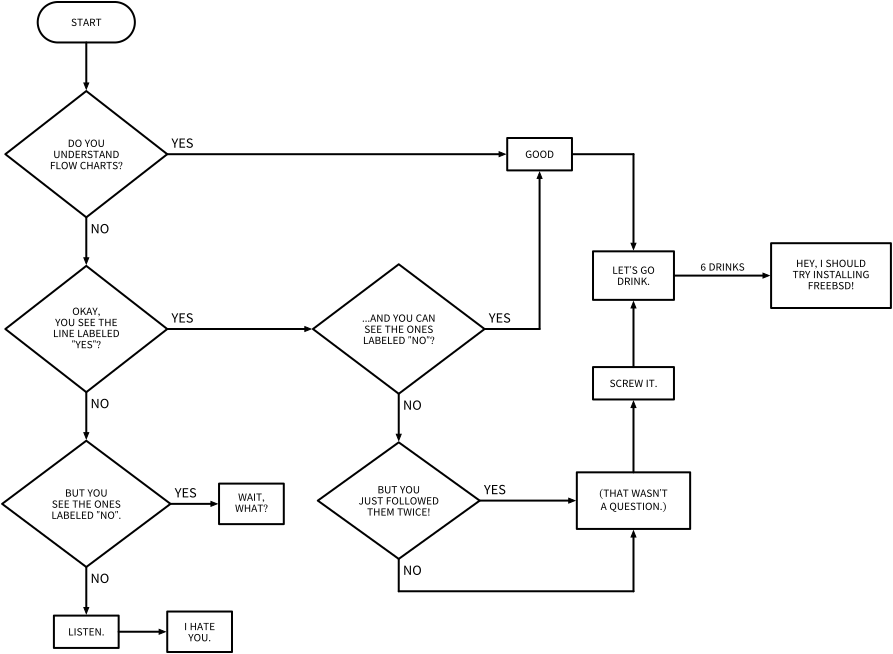

In [28]:
d = schemdraw.Drawing(fontsize=11)
b = d.add(flow.Start(label='START'))
d.add(flow.Arrow(d='down', l=d.unit/2))
d1 = d.add(flow.Decision(w=5, h=3.9, E='YES', S='NO', label='DO YOU\nUNDERSTAND\nFLOW CHARTS?'))
d.add(flow.Arrow(l=d.unit/2))
d2 = d.add(flow.Decision(w=5, h=3.9, E='YES', S='NO', label='OKAY,\nYOU SEE THE\nLINE LABELED\n"YES"?'))
d.add(flow.Arrow(l=d.unit/2))
d3 = d.add(flow.Decision(w=5.2, h=3.9, E='YES', S='NO', label='BUT YOU\nSEE THE ONES\nLABELED "NO".'))

d.add(flow.Arrow(d='right', xy=d3.E, l=d.unit/2))
d.add(flow.Box(w=2, h=1.25, label='WAIT,\nWHAT?', anchor='W'))
d.add(flow.Arrow(d='down', xy=d3.S, l=d.unit/2))
listen = d.add(flow.Box(w=2, h=1, label='LISTEN.'))
d.add(flow.Arrow(d='right', xy=listen.E, l=d.unit/2))
hate = d.add(flow.Box(w=2, h=1.25, label='I HATE\nYOU.', anchor='W'))

d.add(flow.Arrow(d='right', xy=d1.E, l=d.unit*3.5))
good = d.add(flow.Box(w=2, h=1, label='GOOD', anchor='W'))
d.add(flow.Arrow(d='right', xy=d2.E, l=d.unit*1.5))
d4 = d.add(flow.Decision(w=5.3, h=4.0, E='YES', S='NO', label='...AND YOU CAN\nSEE THE ONES\nLABELED "NO"?', anchor='W'))

d.add(flow.Line(d='right', xy=d4.E, tox=good.S))
d.add(flow.Arrow(d='up', toy=good.S))
d.add(flow.Arrow(d='down', xy=d4.S, l=d.unit/2))
d5 = d.add(flow.Decision(w=5, h=3.6, E='YES', S='NO', label='BUT YOU\nJUST FOLLOWED\nTHEM TWICE!'))
d.add(flow.Arrow(d='right', xy=d5.E, l=d.unit))
question = d.add(flow.Box(w=3.5, h=1.75, label="(THAT WASN'T\nA QUESTION.)", anchor='W'))
d.add(flow.Line(d='down', xy=d5.S, l=d.unit/3))
d.add(flow.Line(d='right', tox=question.S))
d.add(flow.Arrow(d='up', toy=question.S))

d.add(flow.Line(d='right', xy=good.E, tox=question.S))
d.add(flow.Arrow(d='down', l=d.unit))
drink = d.add(flow.Box(w=2.5, h=1.5, label="LET'S GO\nDRINK."))
d.add(flow.Arrow(d='right', xy=drink.E, label='6 DRINKS'))
d.add(flow.Box(w=3.7, h=2, label='HEY, I SHOULD\nTRY INSTALLING\nFREEBSD!', anchor='W'))
d.add(flow.Arrow(d='up', xy=question.N, l=d.unit*.75))
screw = d.add(flow.Box(w=2.5, h=1, label='SCREW IT.', anchor='S'))
d.add(flow.Arrow(d='up', xy=screw.N, toy=drink.S))
d.draw()


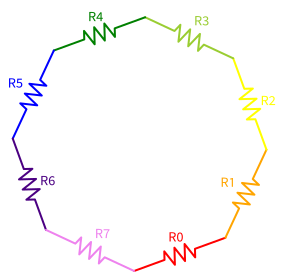

In [29]:
d = schemdraw.Drawing()
for i, color in enumerate(['red', 'orange', 'yellow', 'yellowgreen', 'green', 'blue', 'indigo', 'violet']):
    d.add(elm.Resistor(label='R{}'.format(i), theta=45*i+20, color=color))
d.draw()

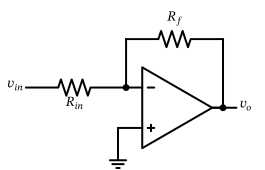

In [30]:
#import matplotlib.pyplot as plt
#plt.xkcd()

d = schemdraw.Drawing(inches_per_unit=.5)
op = d.add(elm.Opamp)
d.add(elm.Line(d='left', xy=op.in2, l=d.unit/4))
d.add(elm.Line(d='down', l=d.unit/5))
d.add(elm.Ground)
d.add(elm.Line(d='left', xy=op.in1, l=d.unit/6))
d.add(elm.Dot)
d.push()
Rin = d.add(elm.Resistor(d='left', xy=Point(op.in1)-Point((d.unit/5,0)), botlabel='$R_{in}$', lftlabel='$v_{in}$'))
d.pop()
d.add(elm.Line(d='up', l=d.unit/2))
Rf = d.add(elm.Resistor(d='right', l=d.unit*1, label='$R_f$'))
d.add(elm.Line(d='down', toy=op.out))
d.add(elm.Dot)
d.add(elm.Line(d='left', tox=op.out))
d.add(elm.Line(d='right', l=d.unit/4, rgtlabel='$v_{o}$'))
d.draw()
